In [12]:
#Imports
import os
import pandas as pd
# import torch
# from albumentations import Compose, ShiftScaleRotate, Resize, Blur, HorizontalFlip, Normalize, ElasticTransform
import numpy as np
# from albumentations.pytorch import ToTensor
import matplotlib.pyplot as plt
import pickle

In [13]:
train = pickle.load(open('train.pickle', 'rb'))
valid = pickle.load(open('valid.pickle', 'rb'))
test = pickle.load(open('test.pickle', 'rb'))
labels = pickle.load(open('labels.pickle', 'rb'))
std_gray = pickle.load(open('std_gray.pickle', 'rb'))
std_rgb = pickle.load(open('std_rgb.pickle', 'rb'))
mean_gray = pickle.load(open('mean_image_gray.pickle', 'rb'))
mean_rgb = pickle.load(open('mean_image_rgb.pickle', 'rb'))
data_rgb = pickle.load(open('data3.pickle', 'rb'))
data_gray = pickle.load(open('data8.pickle', 'rb'))

In [14]:
label_names = pd.read_csv('label_names.csv')

In [15]:
label_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [16]:
X_train = train['features']
y_train = train['labels']
X_valid = valid['features']
y_valid = valid['labels']
X_test = test['features']
y_test = test['labels']

X_train_gray = data_gray['x_train']
y_train_gray = data_gray['y_train']
X_valid_gray = data_gray['x_validation']
y_valid_gray = data_gray['y_validation']
X_test_gray = data_gray['x_test']
y_test_gray = data_gray['y_test']

X_train_rgb = data_rgb['x_train']
y_train_rgb = data_rgb['y_train']
X_valid_rgb = data_rgb['x_validation']
y_valid_rgb = data_rgb['y_validation']
X_test_rgb = data_rgb['x_test']
y_test_rgb = data_rgb['y_test']

#changing shape, as axes are at different position
X_train_gray = X_train_gray.swapaxes(1,3)
X_valid_gray = X_valid_gray.swapaxes(1,3)
X_test_gray = X_test_gray.swapaxes(1,3)

X_train_rgb = X_train_rgb.swapaxes(1,3)
X_valid_rgb = X_valid_rgb.swapaxes(1,3)
X_test_rgb = X_test_rgb.swapaxes(1,3)

In [18]:
#creating dataframe for labels from test set
df_train = pd.DataFrame(data = train['labels'], columns = ['ClassId'])
#merging tables
df_labels = pd.merge(df_train, label_names, on='ClassId', how='left').reset_index(drop=True)
#grouping data
df_labels = df_labels.groupby(by=['SignName'])
#sum data
df_labels = df_labels.count()

In [20]:
df_labels

,ClassId
SignName,
Ahead only,1080
Beware of ice/snow,390
Bicycles crossing,240
Bumpy road,330
Children crossing,480
Dangerous curve to the left,180
Dangerous curve to the right,300
Double curve,270
End of all speed and passing limits,210


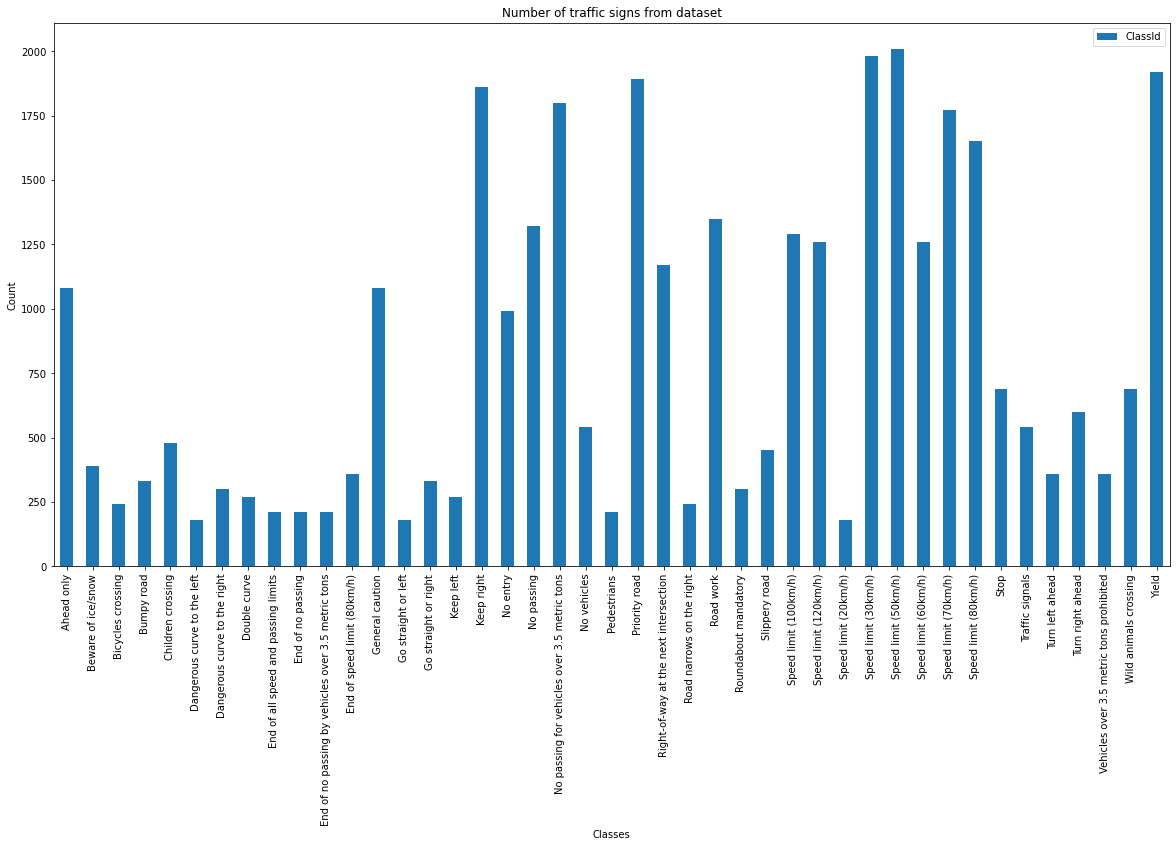

In [19]:
#how many samples of each class plot
df_labels.plot(kind = 'bar', figsize=(20, 10), xlabel = 'Classes', ylabel = 'Count')
plt.title('Number of traffic signs from dataset')
plt.show()

In [ ]:
#normalize to range 0-1:
X_train = X_train /255.0
X_test = X_test /255.0
X_valid = X_valid /255.0

X_train_gray = X_train_gray /255.0
X_test_gray = X_test_gray /255.0
X_valid_gray = X_valid_gray /255.0

X_train_rgb = X_train_rgb /255.0
X_test_rgb = X_test_rgb /255.0
X_valid_rgb = X_valid_rgb /255.0